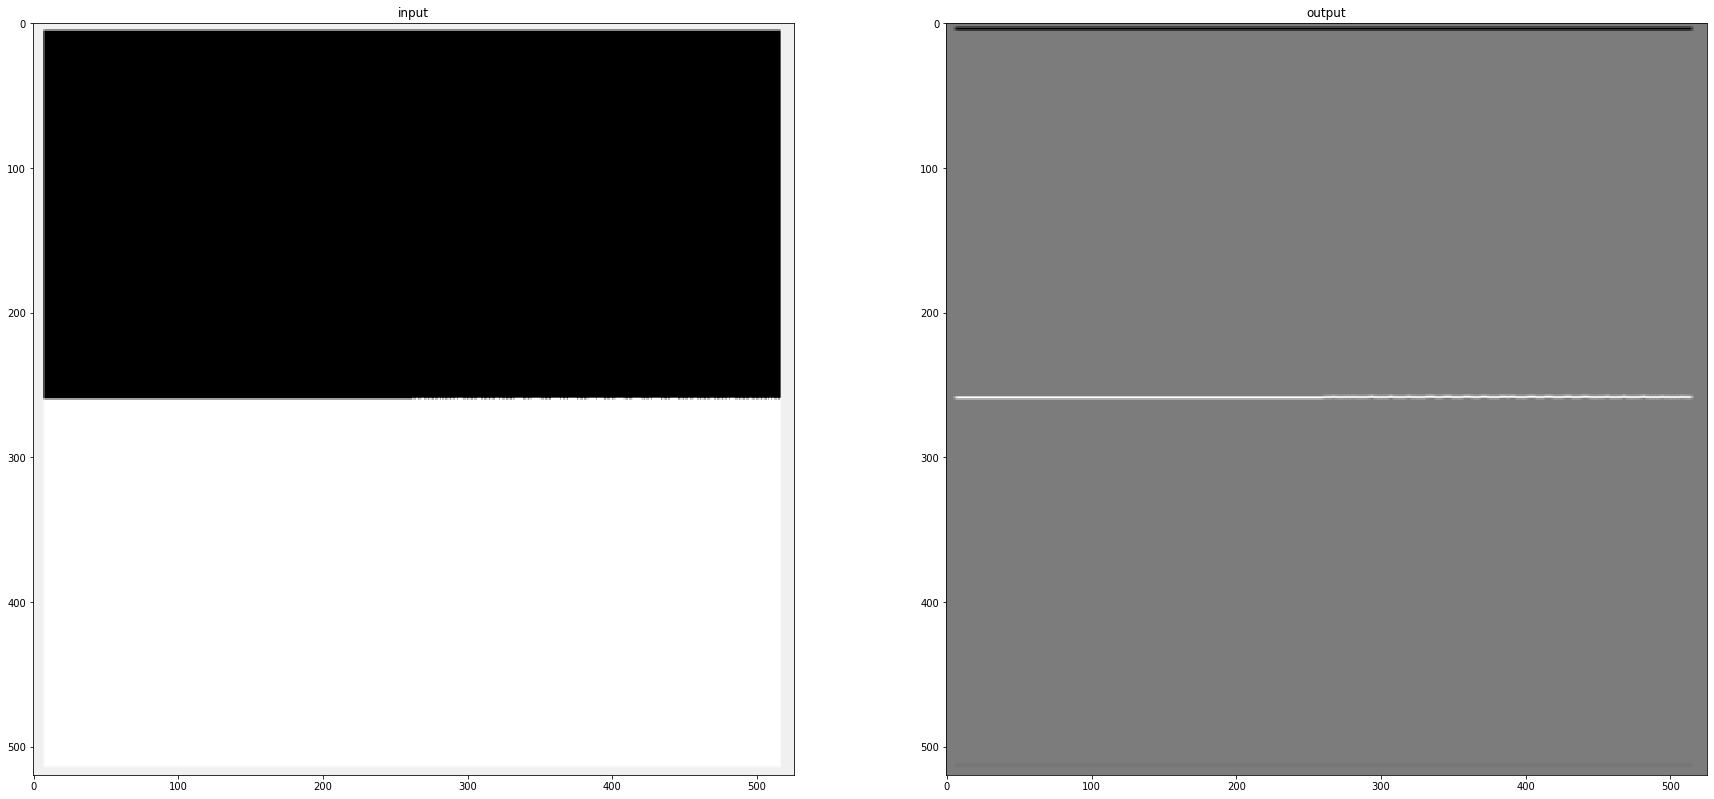

In [4]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 
  
def conv(im,filt):
    orig_h,orig_w = im.shape
    filt_size = filt.shape[0]
    if filt_size%2 == 1:
        pad = filt_size//2
        pad_im = np.pad(im,(pad,pad),mode='constant')
    else:
        filt = np.pad(filt,(1,0),mode='constant')
        
    kernel = np.flipud(np.fliplr(filt))
    start_h = filt_size//2
    start_w = filt_size//2
    
    new_h = (orig_h - filt_size + 2*(filt_size//2)) + 1
    new_w = (orig_w - filt_size + 2*(filt_size//2)) + 1
    output = np.zeros((new_h,new_w))
    i1=0
    for i in range(start_h,new_h - start_h):
        i2 = 0
        for j in range(start_w,new_w - start_w):
            cur = im[(i-start_h):(i+start_h+1),(j-start_w):(j+start_w+1)]
            output[i1,i2] = np.sum(np.multiply(cur,kernel))
            i2=i2+1
        i1+=1    
    return output



box = cv2.imread('../input/box.png',0)
ch = cv2.imread('../input/chess.jpg',0)
filt = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

output = conv(box,filt)
output_c = conv(ch,filt)
plt.figure(figsize = (30,30))
plt.subplot(1,2,1)
plt.imshow(box,'gray')
plt.title('input')
plt.subplot(1,2,2)
plt.imshow(output,'gray')
plt.title('output')
plt.show()

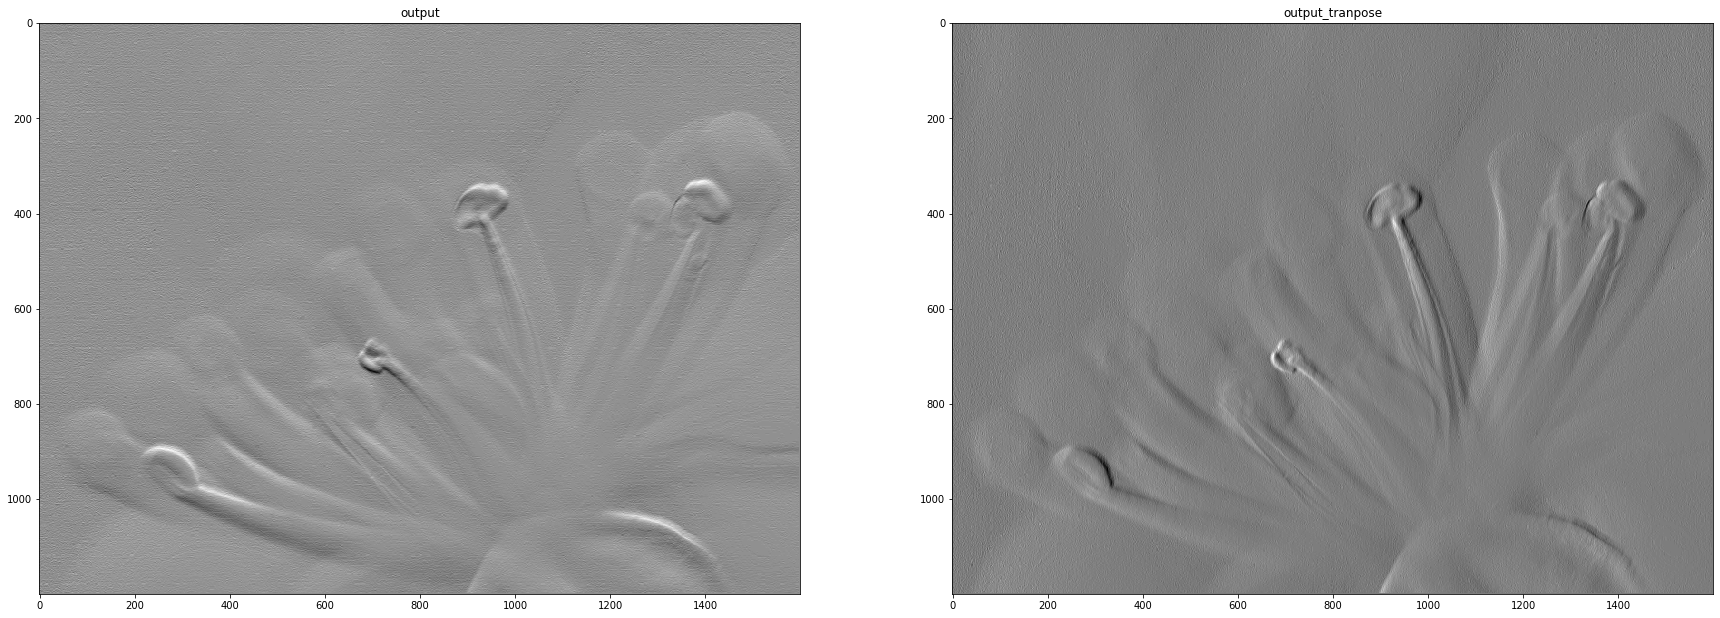

In [2]:
blur = cv2.imread('../input/blur.jpg',0)
filt = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
transpose = filt.T

# output = cv2.filter2D(blur, cv2.CV_8U, filt) 
# output_t = cv2.filter2D(blur, cv2.CV_8U, transpose)

output = conv(blur,filt)
output_t = conv(blur,transpose)

cv2.normalize(output,output, 0, 255, cv2.NORM_MINMAX)
output = output.astype('uint8')

cv2.normalize(output_t,output_t, 0, 255, cv2.NORM_MINMAX)
output_t = output_t.astype('uint8')


plt.figure(figsize = (30,30))
plt.subplot(1,3,1)
plt.imshow(blur,'gray')
plt.title('input')
plt.subplot(1,2,1)
plt.imshow(output,'gray')
plt.title('output')
plt.subplot(1,2,2)
plt.imshow(output_t,'gray')
plt.title('output_tranpose')
plt.show()


On convolving with the first matrix [1,1,1][0,0,0][-1,-1,-1] as a filter , we get gradients and detect the edges in the vertical direction.

On convolving with the transpose of it as a filter , we get gradients and detect the edges in the horizontal direction.

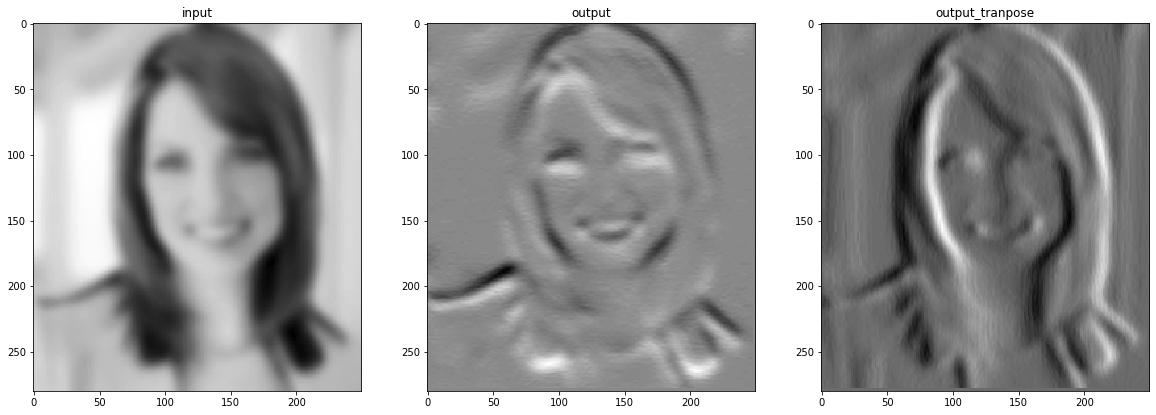

In [3]:
blur_1 = cv2.imread('../input/blur_1.jpg',0)
fil = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
transpose = fil.T

# output = cv2.filter2D(blur_1, cv2.CV_8U, fil) 
# output_t = cv2.filter2D(blur_1, cv2.CV_8U, transpose)

output = conv(blur_1,filt)
output_t = conv(blur_1,transpose)

cv2.normalize(output,output, 0, 255, cv2.NORM_MINMAX)
output = output.astype('uint8')

cv2.normalize(output_t,output_t, 0, 255, cv2.NORM_MINMAX)
output_t = output_t.astype('uint8')

plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(blur_1,'gray')
plt.title('input')
plt.subplot(1,3,2)
plt.imshow(output,'gray')
plt.title('output')
plt.subplot(1,3,3)
plt.imshow(output_t,'gray')
plt.title('output_tranpose')
plt.show()
